In [25]:
import requests
import pandas as pd
from pprint import pprint

from api_keys import nomad_api_key

In [26]:
url_la = "https://nomad-list-cities.p.rapidapi.com/nomad-list/latin-america"
url_na = "https://nomad-list-cities.p.rapidapi.com/nomad-list/north-america"
url_me = "https://nomad-list-cities.p.rapidapi.com/nomad-list/middle-east"
url_oc = "https://nomad-list-cities.p.rapidapi.com/nomad-list/oceania"
url_af = "https://nomad-list-cities.p.rapidapi.com/nomad-list/africa"
url_as = "https://nomad-list-cities.p.rapidapi.com/nomad-list/asia"
url_eu = "https://nomad-list-cities.p.rapidapi.com/nomad-list/europe"

querystring = {"size":"30","page":"1","sort":"desc","sort_by":"overall_score"}

headers = {
	"X-RapidAPI-Key": nomad_api_key,
	"X-RapidAPI-Host": "nomad-list-cities.p.rapidapi.com"
}

response_la = requests.get(url_la, headers=headers, params=querystring)
response_na = requests.get(url_na, headers=headers, params=querystring)
response_me = requests.get(url_me, headers=headers, params=querystring)
response_oc = requests.get(url_oc, headers=headers, params=querystring)
response_af = requests.get(url_af, headers=headers, params=querystring)
response_as = requests.get(url_as, headers=headers, params=querystring)
response_eu = requests.get(url_eu, headers=headers, params=querystring)

response_json_la = response_la.json()
response_json_na = response_na.json()
response_json_me = response_me.json()
response_json_oc = response_oc.json()
response_json_af = response_af.json()
response_json_as = response_as.json()
response_json_eu = response_eu.json()


In [27]:
la_df = pd.DataFrame(response_json_la)
na_df = pd.DataFrame(response_json_na)
me_df = pd.DataFrame(response_json_me)
oc_df = pd.DataFrame(response_json_oc)
af_df = pd.DataFrame(response_json_af)
as_df = pd.DataFrame(response_json_as)
eu_df = pd.DataFrame(response_json_eu)

In [28]:
combined_df = pd.concat([la_df, na_df, me_df, oc_df, af_df, as_df, eu_df])
combined_df

,image_lastmod,region,population,descriptionFromReview,slug,short_slug,long_slug,users_count,users_count_est,users_count_been,...,cost_for_nomad_in_usd,cost_for_expat_in_usd,cost_for_local_in_usd,cost_for_family_in_usd,total_score,overall_score,cost_score,internet_score,leisure_quality,safety_level
0,1676419327,Latin America,3054300,"Pros - extremely cheap (excl. housing), great ...",buenos-aires-argentina,buenos-aires,buenos-aires-argentina,56.0,11200.0,1059.0,...,1792,1194,709,2482.341541,4.050374,4.050374,4.666286,5.000000,4,3.000000
1,1676505683,Latin America,8918653,"I really enjoyed my first week here, but as I ...",mexico-city-mexico,mexico-city,mexico-city-mexico,61.0,12200.0,1487.0,...,1862,1483,1115,3902.690717,4.001144,4.001144,4.586286,3.684211,4,2.000000
2,1676419354,Latin America,2183557,"I love Laureles which is calmer, lots of tress...",medellin-colombia,medellin,medellin-colombia,52.0,10400.0,1124.0,...,1486,1217,973,3406.179475,3.765377,3.765377,5.000000,1.184211,4,1.750000
3,1678147415,Latin America,1495182,"GDL is great for a short trip. But, it's only ...",guadalajara-mexico,guadalajara,guadalajara-mexico,12.0,2400.0,230.0,...,1693,1048,606,2121.980457,3.317857,3.317857,4.779429,1.472368,3,2.218750
4,1675438227,Latin America,8894000,I concur with the most recent review before mi...,lima-peru,lima,lima-peru,6.0,1200.0,567.0,...,1443,1191,959,3355.011155,3.297004,3.297004,5.000000,0.988158,4,3.027171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1675438247,Europe,543825,Rent is cheap by German standards. Clean and t...,dresden-germany,dresden,dresden-germany,2.0,400.0,108.0,...,3276,1979,1178,4123.360272,3.282908,3.282908,2.970286,5.000000,3,4.921875
26,1675438199,Europe,426538,Summers in Tallinn are very pleasant (if not t...,tallinn-estonia,tallinn,tallinn-estonia,3.0,600.0,448.0,...,2763,1961,1194,4180.547756,3.282834,3.282834,3.556571,4.935526,3,4.000000
27,1653091301,Europe,790017,"I quite liked Zagreb. People are fairly warm, ...",zagreb-croatia,zagreb,zagreb-croatia,3.0,600.0,401.0,...,2684,1927,1139,3987.702356,3.282032,3.282032,3.646857,2.802632,2,4.500000
28,1660089930,Europe,209945,English spoken by most and locals are friendly...,ploiesti-romania,ploiesti,ploiesti-romania,NaN,NaN,1.0,...,1625,975,579,2025.427968,3.277075,3.277075,4.857143,5.000000,2,4.000000


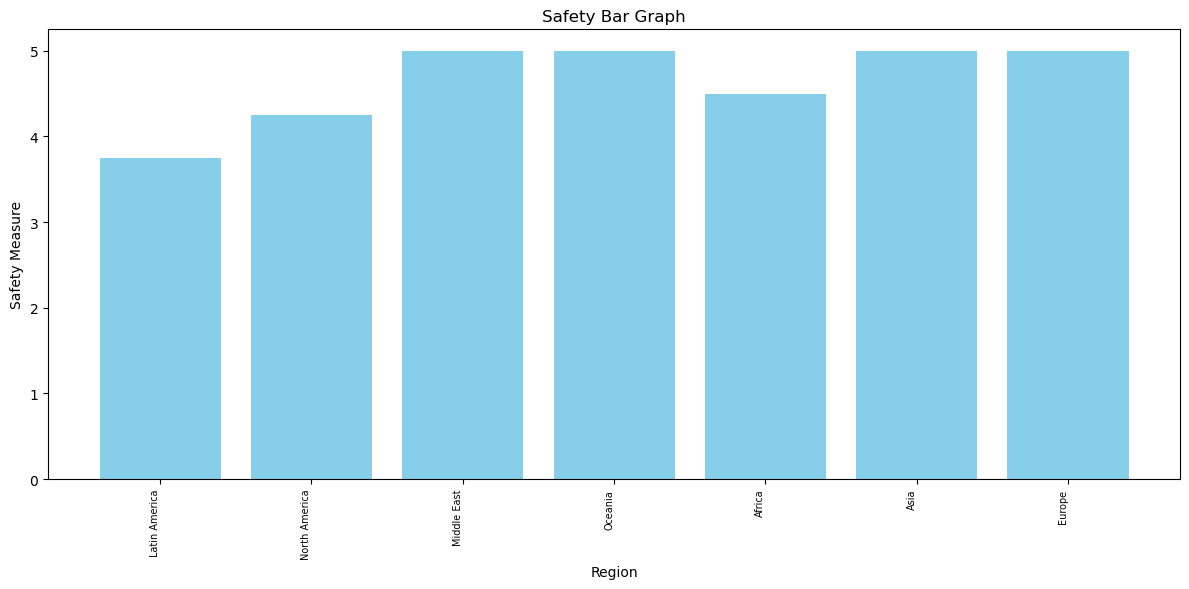

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(cleaned_df['region'], cleaned_df['safety_level'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Safety Measure')
plt.title('Safety Bar Graph')
plt.xticks(rotation=90, ha="right", fontsize=7)  
plt.tight_layout()
plt.savefig("safety_bar_graph.png")
plt.show()

In [29]:
azore_df = combined_df.loc[combined_df['short_slug'] == 'azores']
azore_df

,image_lastmod,region,population,descriptionFromReview,slug,short_slug,long_slug,users_count,users_count_est,users_count_been,...,cost_for_nomad_in_usd,cost_for_expat_in_usd,cost_for_local_in_usd,cost_for_family_in_usd,total_score,overall_score,cost_score,internet_score,leisure_quality,safety_level
21,1676505768,Europe,70000,"Spent 2 years living in Ponta Delgada, one of ...",azores-portugal,azores,azores-portugal,NaN,NaN,83.0,...,2115,1451,653,2283.892447,3.324826,3.324826,4.297143,5.0,5,5.0


In [30]:
new_df = azore_df[['internet_score', 'internet_speed', 'cost_for_nomad_in_usd', 'cost_for_expat_in_usd', 'cost_for_local_in_usd']]
new_df

,internet_score,internet_speed,cost_for_nomad_in_usd,cost_for_expat_in_usd,cost_for_local_in_usd
21,5.0,41,2115,1451,653


In [31]:
azore_df.columns

Index(['image_lastmod', 'region', 'population', 'descriptionFromReview',
       'slug', 'short_slug', 'long_slug', 'users_count', 'users_count_est',
       'users_count_been', 'users_count_been_est', 'boost',
       'last_2_year_growth', 'image', 'name_chinese', 'name',
       'country_chinese', 'air_quality_now', 'air_quality', 'latitude',
       'longitude', 'country', 'country_code', 'country_slug', 'state_code',
       'state_chinese', 'state', 'internet_speed', 'air_quality_score',
       'air_quality_now_score', 'humidity', 'rank', 'weather_icon',
       'weather_emoji', 'temperatureC', 'temperatureF',
       'temperatureC_feels_like', 'temperatureF_feels_like',
       'cost_for_nomad_in_usd', 'cost_for_expat_in_usd',
       'cost_for_local_in_usd', 'cost_for_family_in_usd', 'total_score',
       'overall_score', 'cost_score', 'internet_score', 'leisure_quality',
       'safety_level'],
      dtype='object')

In [32]:
len(combined_df)

210

In [33]:
combined_df.columns

Index(['image_lastmod', 'region', 'population', 'descriptionFromReview',
       'slug', 'short_slug', 'long_slug', 'users_count', 'users_count_est',
       'users_count_been', 'users_count_been_est', 'boost',
       'last_2_year_growth', 'image', 'name_chinese', 'name',
       'country_chinese', 'air_quality_now', 'air_quality', 'latitude',
       'longitude', 'country', 'country_code', 'country_slug', 'state_code',
       'state_chinese', 'state', 'internet_speed', 'air_quality_score',
       'air_quality_now_score', 'humidity', 'rank', 'weather_icon',
       'weather_emoji', 'temperatureC', 'temperatureF',
       'temperatureC_feels_like', 'temperatureF_feels_like',
       'cost_for_nomad_in_usd', 'cost_for_expat_in_usd',
       'cost_for_local_in_usd', 'cost_for_family_in_usd', 'total_score',
       'overall_score', 'cost_score', 'internet_score', 'leisure_quality',
       'safety_level'],
      dtype='object')

In [34]:
cleaned_df = combined_df.drop(columns=['image_lastmod', 'image', 'name_chinese', 'country_chinese', 'state_chinese', 'weather_icon', 'weather_emoji'])
cleaned_df

,region,population,descriptionFromReview,slug,short_slug,long_slug,users_count,users_count_est,users_count_been,users_count_been_est,...,cost_for_nomad_in_usd,cost_for_expat_in_usd,cost_for_local_in_usd,cost_for_family_in_usd,total_score,overall_score,cost_score,internet_score,leisure_quality,safety_level
0,Latin America,3054300,"Pros - extremely cheap (excl. housing), great ...",buenos-aires-argentina,buenos-aires,buenos-aires-argentina,56.0,11200.0,1059.0,211800,...,1792,1194,709,2482.341541,4.050374,4.050374,4.666286,5.000000,4,3.000000
1,Latin America,8918653,"I really enjoyed my first week here, but as I ...",mexico-city-mexico,mexico-city,mexico-city-mexico,61.0,12200.0,1487.0,297400,...,1862,1483,1115,3902.690717,4.001144,4.001144,4.586286,3.684211,4,2.000000
2,Latin America,2183557,"I love Laureles which is calmer, lots of tress...",medellin-colombia,medellin,medellin-colombia,52.0,10400.0,1124.0,224800,...,1486,1217,973,3406.179475,3.765377,3.765377,5.000000,1.184211,4,1.750000
3,Latin America,1495182,"GDL is great for a short trip. But, it's only ...",guadalajara-mexico,guadalajara,guadalajara-mexico,12.0,2400.0,230.0,46000,...,1693,1048,606,2121.980457,3.317857,3.317857,4.779429,1.472368,3,2.218750
4,Latin America,8894000,I concur with the most recent review before mi...,lima-peru,lima,lima-peru,6.0,1200.0,567.0,113400,...,1443,1191,959,3355.011155,3.297004,3.297004,5.000000,0.988158,4,3.027171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Europe,543825,Rent is cheap by German standards. Clean and t...,dresden-germany,dresden,dresden-germany,2.0,400.0,108.0,21600,...,3276,1979,1178,4123.360272,3.282908,3.282908,2.970286,5.000000,3,4.921875
26,Europe,426538,Summers in Tallinn are very pleasant (if not t...,tallinn-estonia,tallinn,tallinn-estonia,3.0,600.0,448.0,89600,...,2763,1961,1194,4180.547756,3.282834,3.282834,3.556571,4.935526,3,4.000000
27,Europe,790017,"I quite liked Zagreb. People are fairly warm, ...",zagreb-croatia,zagreb,zagreb-croatia,3.0,600.0,401.0,80200,...,2684,1927,1139,3987.702356,3.282032,3.282032,3.646857,2.802632,2,4.500000
28,Europe,209945,English spoken by most and locals are friendly...,ploiesti-romania,ploiesti,ploiesti-romania,NaN,NaN,1.0,200,...,1625,975,579,2025.427968,3.277075,3.277075,4.857143,5.000000,2,4.000000


In [35]:
cleaned_df.reset_index(inplace=True, drop=True)

In [36]:
cleaned_df.to_json(r'export_dataframe.json', orient='records')

In [37]:
from pymongo import MongoClient
from pprint import pprint

In [38]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [39]:
print(mongo.list_database_names())

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'project3', 'travel_db', 'uk_food']


In [40]:
db = mongo['project3']

In [41]:
print(db.list_collection_names())

['nomads']


In [42]:
nomad_destinations = db['nomads']

In [43]:
from flask import Flask, jsonify

In [44]:
print(cleaned_df.columns)

Index(['region', 'population', 'descriptionFromReview', 'slug', 'short_slug',
       'long_slug', 'users_count', 'users_count_est', 'users_count_been',
       'users_count_been_est', 'boost', 'last_2_year_growth', 'name',
       'air_quality_now', 'air_quality', 'latitude', 'longitude', 'country',
       'country_code', 'country_slug', 'state_code', 'state', 'internet_speed',
       'air_quality_score', 'air_quality_now_score', 'humidity', 'rank',
       'temperatureC', 'temperatureF', 'temperatureC_feels_like',
       'temperatureF_feels_like', 'cost_for_nomad_in_usd',
       'cost_for_expat_in_usd', 'cost_for_local_in_usd',
       'cost_for_family_in_usd', 'total_score', 'overall_score', 'cost_score',
       'internet_score', 'leisure_quality', 'safety_level'],
      dtype='object')


In [45]:
from flask import Flask
from flask_pymongo import PyMongo

In [46]:
app = Flask(__name__)
app.config["MONGO_URI"] = "mongodb://localhost:27017/project3"
mongo = PyMongo(app)

In [47]:
print(mongo)